##Learning Objectives:

_____________
- Have a clear understanding of extractive and abstractive methods used in text summarization and their inference.
- Acquire knowledge on retrieval and generative chatbots, their differences and list out libraries for chatbot inference and finetuning.
- Understand how transformer-based models incorporate both lexical and syntactic similarities to determine textual entailment.
- Gain an idea of how transformer embeddings can be utilized to calculate semantic similarity between sentences, perform scoring, and retrieve information.

##Prerequisites:
_____
To start this lesson **all students must be aware** of the following concepts:
- Understanding of natural language processing (NLP) concepts such as text classification, sentiment analysis, and machine translation.
- Familiarity with neural network architectures such as Transformers and Large Language Modeling techniques.
- Understanding of word embeddings and language models; their use in NLP tasks.
- Understanding of textual entailment, including the relationship between sentences and how it can be used to infer the truthfulness of statements.


# 5. Applications with LLMs

Now that we have understanding of basic Transformer Architecture and LLM, let's explore the uses cases of LLM.

LLMs have wide range of applications, in this section we'll be exploring the following topics:
 * Text Summarization
 * Open Domain Chatbot
 * Textual Entailment
 * Embeddings → Scoring


## 5.1 Text Summarization



In this section, we'll examine text summarization—the process of condensing lengthy documents into concise summaries—and how LLMs can be utilized for it. This is one of the most difficult NLP tasks because it calls for a variety of skills, including the ability to comprehend lengthy paragraphs and produce writing that effectively summarizes a document's major points. But when done correctly, text summary is a potent tool that can accelerate a number of business procedures by eliminating the need for subject-matter specialists to study lengthy papers in-depth.


### 5.1.1 Types of Summarization
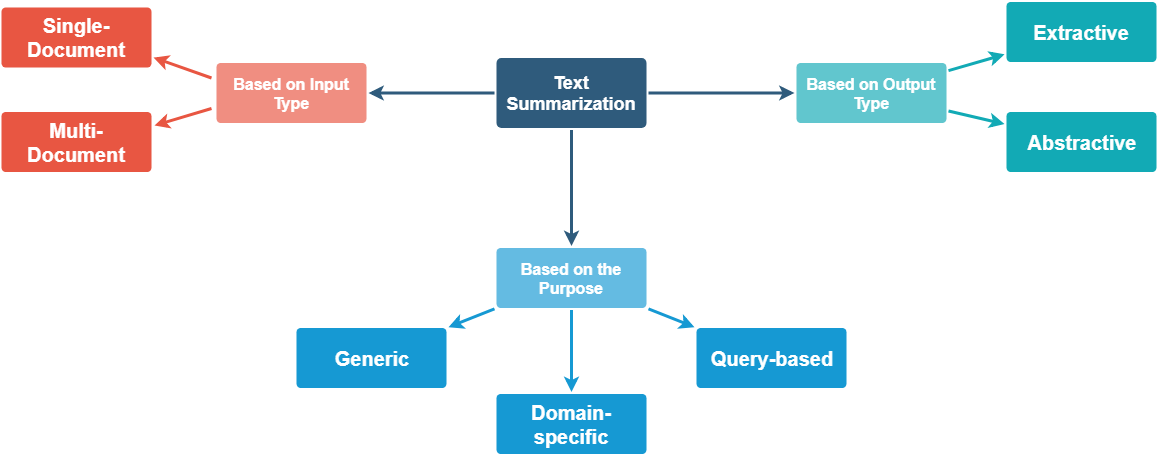

**Figure:** [Text Summarization Article](https://devopedia.org/text-summarization)

There are 2 types of summary generation mechanisms based on the output type:

**Extractive Summary:** The model selects the most important sentences or phrases from the original text and constructs a summary by arranging them in a coherent way. This approach preserves the wording of the original text and generates a summary that is a subset of the original text. Extractive summarization is often used for news articles or scientific papers where the most important information is already present in the original text.

Encoder-based  models such as BERT is used for extractive summary tasks, since it suffice to predict range (start and end) of tokens that best represent the summary from input sequence.

**Abstractive Summary:** It  involves creating a new summary that captures the essence of the original text, but is not restricted to the wording or structure of the original text. Abstractive summarization requires the model to understand the meaning of the text and generate new sentences that are not present in the original text.



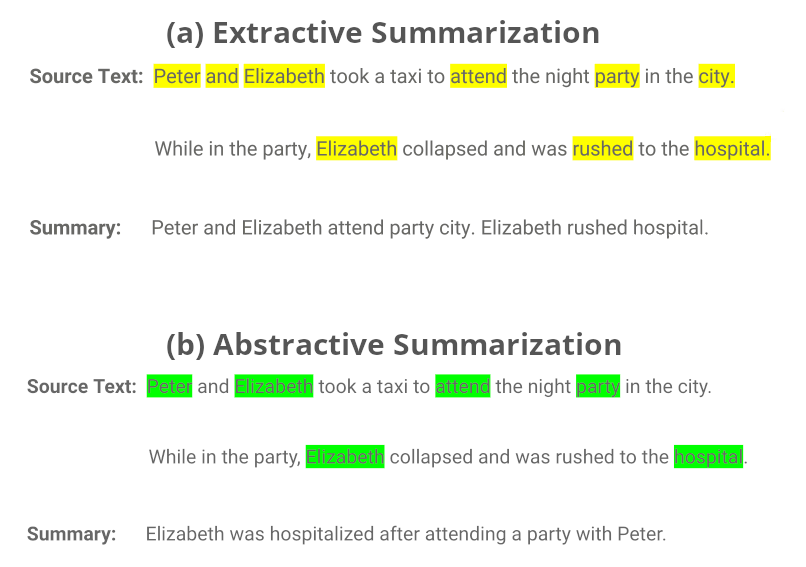

**Figure:** [Text Summarization Article](https://devopedia.org/text-summarization)

We will be focusing on Abstractive Summary Generation using LLMs.

### 5.1.2 Models for Abstractive Text Summarization
Encoder-decoder architecture is used in majority of Transformer models for summarization. There are certain exceptions, such as the GPT family of models, which can also be applied to summarizing in scenarios with few settings. The models that can be used for summarization are as follows:

* T5
* GPT2
* mT5
* BART
* PEGASUS



### 5.1.3 Inference Examples  using Huggingface Pipeline
The Hugging Face library provides an easy-to-use interface for working with transformer models. Here's an example code for using a pre-trained transformer model for abstractive summarization on English texts:


In [ ]:
!pip install -Uqq transformers[sentencepiece]
!pip install -Uqq datasets

In [ ]:
from transformers import pipeline

# Load the pre-trained model for summarization
summarizer = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")

# Define the input text
input_text = " There are two main types of text summarization: extractive and abstractive. Extractive summarization involves \
 selecting the most important sentences or phrases from the input text and concatenating them to create a summary.\
  Abstractive summarization involves generating new sentences that capture the essence of the input text. \
  The transformer model can be used for both extractive and abstractive summarization. For extractive summarization, \
  the transformer model can be trained to identify the most important sentences or phrases in the input text. \
  For abstractive summarization, the transformer model can be trained to generate new sentences that summarize the input text."

# Generate a summary using the pre-trained model
summary = summarizer(input_text, max_length=96, min_length=10, clean_up_tokenization_spaces=True, do_sample=True)

# Print the summary
for line in summary[0]['summary_text'].split('.'):
  print(line)

There are two main types of text summarization: extractive and abstractive
 For extractive summarization, the transformer model can be trained to identify the most important sentences or phrases from the input text and concatenate them to create a summary
 For abstractive summary, the model is trained to generate new sentences that capture the essence of the text



#### Other Summarizing LLMs on the Huggingface Hub
[Hugging Face Model-Hub Summarization Section](https://huggingface.co/models?pipeline_tag=summarization&sort=downloads) provides a range of pre-trained summarization models that developers can use to integrate summarization into their applications.
These models have been trained on large datasets and are finetuned in multiple languages and different types of texts, including news, scientific papers, and social media.

Let's select a suitable model that is trained on medical scientific texts and use it for summarization.




In [ ]:
summarizer = pipeline("summarization", model="google/pegasus-pubmed")

input_text = "Cl nmr line width and activity measurements are reported for the zinc, mercury and cadmium\
 forms of bovine and human carbonic anhydrase B. The zinc data agree well with previous reports; however,\
  there is no 35Cl nmr line broadening observed for the cadmium and mercury derivatives of the enzyme which\
   are inactive in the presence of excess zinc. The results suggest altered coordination geometry or first\
    coordination sphere saturation by protein ligands for the cadmium and mercury derivatives of the enzyme."

summary = summarizer(input_text, max_length=50, min_length=10, clean_up_tokenization_spaces=True, do_sample=True)

# Print the summary
for line in summary[0]['summary_text'].split('.'):
  print(line)

nmr line width and activity measurements were made for the zinc and mercury human forms of carbonichydrase
 <n> nmr line width and activity measurements are reported for the zinc and mercury human forms of carbonichydrase,


These models can be fine-tuned to improve its performance on a specific dataset by retraining the model on a domain-specific dataset. Do note that fine-tuning both the encoder and decoder can be very memory-intensive.

Resources for Fine-tuning Models for Summarization:

* [T5](https://colab.research.google.com/drive/1z-Zl2hftMrFXabYfmz8o9YZpgYx6sGeW?usp=sharing)
* [BART](https://towardsdatascience.com/fine-tuning-the-bart-large-model-for-text-summarization-3c69e4c04582)
* [PEGASUS](https://gist.github.com/jiahao87/50cec29725824da7ff6dd9314b53c4b3)

## 5.2 Open Domain Chatbot

Open domain chatbots are virtual agents that can engage in a conversation with a human user on a wide range of topics a free-flowing conversation. Unlike goal-oriented chatbots, which are designed to accomplish a specific task such as booking a hotel or ordering food, open domain chatbots can handle a variety of topics including social, factual, or even philosophical.

LLMs such as ChatGPT have dominated the field of chatbot in tasks including: chit-chat, formal writing, creative writing, writing code, etc.

In the following sections, we will discuss the challenges that concern open domain chatbots and how LLMs are being used in this domain.

###5.2.1 Challenges:
* **Clean Dataset:** While numerous open-sourced LLMs have been trained, they often fail to generate responses as good as GPT-3, highlighting the importance of quality training data. Building clean datasets can be difficult due to the large amount of unstructured data available, and the development of high-quality labeled data can be time-consuming and expensive.
* **Bias and offensive responses:** Transformer models can generate responses that are biased or offensive, highlighting the importance of ethical considerations in their development.
* **Contextual understanding:** Transformer models may struggle with understanding the context of a conversation, leading to responses that are inconsistent with the overall topic.
* **Lack of empathy:** Transformer models lack empathy and emotional intelligence, making it difficult for them to generate responses that are appropriate for certain types of conversations.
* **Limited domain knowledge:** Transformer models may have limited domain knowledge, leading to inaccurate or irrelevant responses when faced with complex or specialized topics.
* **User engagement:** Transformer models may struggle to keep users engaged in a conversation, leading to a less satisfying user experience.


### 5.2.2 Types of Chatbots based on Models:


#### 5.2.2.1 Retrieval-based chatbots:
Given a dialogue history (context), it retrieves the next dialogue utterance by scoring a large set of candidate responses (typically all possible training responses).

Retrieval-based chatbots use pre-defined responses based on specific keywords or phrases that users input into the chatbot. Retrieval-based chatbots using transformer models often rely on pre-trained models such as BERT to match user inputs with the appropriate response.

* Retrieval-based chatbots can be faster and more accurate than generative chatbots, but they are less flexible and may not be able to handle more complex user queries.
* Pre-defined responses in retrieval-based chatbots need to be carefully crafted to ensure that they cover all possible user queries and provide accurate and helpful responses.

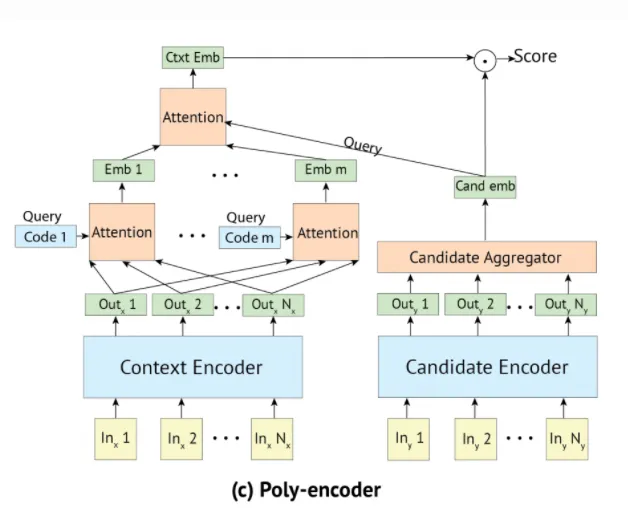

Figure: [Poly-encoders: Transformer Architectures and Pre-training Strategies for Fast and Accurate Multi-sentence Scoring](https://arxiv.org/abs/1905.01969)

* Retrieval-based chatbots score a large set of candidate responses based on their similarity to the input context.
* The context is represented as a sequence of tokens and fed into a polymer transformer model to generate an embedding.
* Candidate responses are also represented as token sequences and fed into the model to generate embeddings.
* Embeddings for candidate responses are compared to the context embedding using a similarity metric such as cosine similarity.
* The candidate response with the highest similarity score is selected as the next dialogue response.
* Additional criteria such as relevance and diversity may be used to refine the selection of the final response.

**Inference (Retrieval-based chatbot)**

We use [ParlAI](https://parl.ai/), an open-source platform for training and evaluating dialogue models.
* We will be using Poly Encoder Model (zoo:pretrained_transformers/model_poly/model)
* We can set a persona (doctor, teacher, etc) for the bot.
* The possible candidate responses are stored in:
```
'data/models/pretrained_transformers/convai_trainset_cands.txt'
```
[Learn more about ParlAI usage and finetuning.](https://colab.research.google.com/drive/1bRMvN0lGXaTF5fuTidgvlAl-Lb41F7AD#scrollTo=nRJGRtMKmIWV)

In the following code snippet, we load [convai_2 candidate dataset](https://huggingface.co/datasets/conv_ai2) (list of all possible outputs) and use ParlAI Poly-encoder Transformers to infere retrieveal-based chatbot:

In [ ]:
# Install ParlAI and necessary dependencies
!pip install -Uqq parlai

# Download canddidate outputs (Outputs will be seletected among the sentences of this txt file)
!mkdir -p data/models/pretrained_transformers
!wget -O data/models/pretrained_transformers/convai_trainset_cands.txt "https://www.dropbox.com/s/ty2az603ke6hgl6/convai_trainset_cands.txt?dl=0"

**Note:** This code encodes fixed candidates and might take a while. (GPU Acceleration Recommended)

In [ ]:
from parlai.core.agents import create_agent_from_model_file

persona = "A friend"
model_file = "zoo:pretrained_transformers/model_poly/model"

blender_agent = f"your persona: I am {persona}.\nyour persona: My name is PolyChatBoty."
blender_agent = create_agent_from_model_file(
    model_file=model_file,
    opt_overrides={"no_cuda": False, "interactive_mode": True},
)

05:52:20 | Using CUDA
05:52:20 | loading dictionary from /usr/local/lib/python3.10/dist-packages/data/models/pretrained_transformers/model_poly/model.dict
05:52:20 | num words = 54944
05:52:20 | Polyencoder: full interactive mode on.
05:52:24 | Total parameters: 256,081,920 (256,081,920 trainable)
05:52:24 | Loading existing model parameters from /usr/local/lib/python3.10/dist-packages/data/models/pretrained_transformers/model_poly/model
05:52:32 | Loading fixed candidate set from data/models/pretrained_transformers/convai_trainset_cands.txt
05:52:32 | Loading fixed candidate set vectors from /usr/local/lib/python3.10/dist-packages/data/models/pretrained_transformers/model_poly/model.convai_trainset_cands.vecs
05:52:32 | Encoding fixed candidates set from (514 batch(es) of up to 256) ]


100%|██████████| 514/514 [01:42<00:00,  5.00it/s]


05:54:15 | Saving fixed candidate set encodings to /usr/local/lib/python3.10/dist-packages/data/models/pretrained_transformers/model_poly/model.convai_trainset_cands.encs


/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
# Predictor for Chatbot
question = input("Enter text: ")
blender_agent.observe({"text": question, "episode_done": False})
response = blender_agent.act()
msg = response["text"]
print(f"\nQuestion: {question}\nReply: {msg}")

Enter text: What music genre do you listen to?

Question: What music genre do you listen to?
Reply: mostly rap


#### 5.2.2.2 Generative chatbots:
Generative chatbots use transformer models to generate new responses based on the input from users. These chatbots are more flexible than retrieval-based chatbots, as they can generate responses based on a wide variety of input. However, generative chatbots can also be more challenging to train and may require large amounts of training data to generate high-quality responses.
* Some of the most common transformer-based models used for generative chatbots include GPT-2, GPT-3, T5, BART, DialoGPT, .




**Inference:** Here is an example code snippet for a simple generative chatbot using the Hugging Face Transformers library and the [DialoGPT model](https://www.microsoft.com/en-us/research/project/large-scale-pretraining-for-response-generation/#:~:text=DialoGPT%20adapts%20pretraining%20techniques%20to,layer%20transformer%20as%20model%20architecture.).

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch


tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-large", padding_side='left')
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-large")

# Let's chat for 5 lines
for step in range(2):
    # encode the new user input, add the eos_token and return a tensor in Pytorch
    new_user_input_ids = tokenizer.encode(input(">> User:") + tokenizer.eos_token, return_tensors='pt')

    # append the new user input tokens to the chat history
    bot_input_ids = torch.cat([chat_history_ids, new_user_input_ids], dim=-1) if step > 0 else new_user_input_ids

    # generated a response while limiting the total chat history to 1000 tokens,
    chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # pretty print last ouput tokens from bot
    print("\nDialoGPT: {}\n".format(tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)))

>> User:When was the universe created?


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.



DialoGPT: I think it was created in the first episode of the show.

>> User:Which series are you refering to exactly?


A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.



DialoGPT: The one with the aliens.



## 5.3 Textual Entailment

Textual Entailment is one of the most complicated tasks in NLP, which involves determining if a given text (the hypothesis) logically follows from another text (the premise). It aims at understanding and reasoning the meaning of natural language text, identify underlying relation and making intelligent inferences based on that relationship.

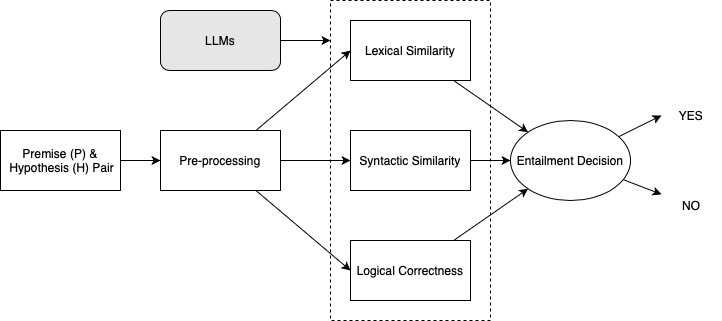

**Figure:** Textual Entailment and LLMs.

### 5.3.1 Transformer Approach to Textual Entailment

The task of textual entailment can be approached in a variety of ways, including rule-based, ML-based, and NN-based methods.

In this section, we will look into how Transformer models focuses on **Lexical** and **Syntactic similarity** to produce entailment decisions.



#### 5.3.1.1 Lexical Similarity
Lexical similarity refers to the degree of overlap between the words in the premise and the hypothesis. The premise and hypothesis are considered to be lexically similar if they share many common words.

**Consider two sentences:**

```
The cat is on the mat
A feline is on the carpet
```
These sentences have high lexical similarity because they share many words such as "cat" and "on".

* The Transformer-based models use attention mechanisms to determine the relevance of each word in the premise and hypothesis. The attention mechanism enables the model to assign higher weights to the words that are more important in the decision-making process.

* The model uses these weights to calculate the lexical similarity score between the premise and hypothesis. A high lexical similarity score indicates a high probability of entailment.



#### 5.3.1.2 Syntactic Similarity
Syntactic similarity, on the other hand, refers to the similarity in the grammatical structure of the premise and hypothesis.

**Consider two sentences:**

```
John hit the ball with a bat
The ball was hit by John using a bat
```
These sentences have high syntactic similarity despite having different words because they have similar grammatical structures.

* The Transformer-based models learn the syntactic patterns in the training data and use this knowledge to identify the syntactic similarity between the premise and hypothesis.
* Multi-Head attention is used to find relationship between the inputs and create specific contextualized embeddings. One head's softmax has a tendency to concentrate mostly on one similarity while others might concentrate on the subject-verb relationship or look for surrounding adjectives and so forth.
* The models use syntactic features like dependency trees and part-of-speech tags to compute the syntactic similarity score.
* The score represents the degree to which the premise and hypothesis share similar syntactic structures. A high syntactic similarity score indicates a high probability of entailment.

#### 5.3.1.3 Logical Correctness
It is important to note that lexical similarity does not necessarily imply logical similarity.

While the transformer models can capture the lexical and syntactic similarities between words, they may not be able to capture the logical relationships between the words. As a result, researchers have been exploring ways to incorporate logical reasoning into transformer models to improve their performance in tasks that require logical entailment, such as question answering and text classification.

**Differences between Logical & Lexical/Syntactic Similarity**

Consider the **English** language and **our real world**, where it rains only if it is cloudy.

Consider two sentences:

```
It is cloudy. (The Premise)
It is rainy.  (The Hypothesis)
```




The following inference is syntactically (grammatically) correct but logically wrong:
```
It is not cloudy. (The Premise)
It is rainy.      (The Hypothesis)
```
So, the hypothesis does not entail the premise in this example.



By combining the lexical and syntactic similarity scores, Transformer-based models can produce more accurate entailment decisions. These models have shown promising results in various applications of textual entailment, such as natural language inference, question answering, and machine translation. However, there are still challenges in improving the interpretability of these models and incorporating world knowledge to overcome their limitations.

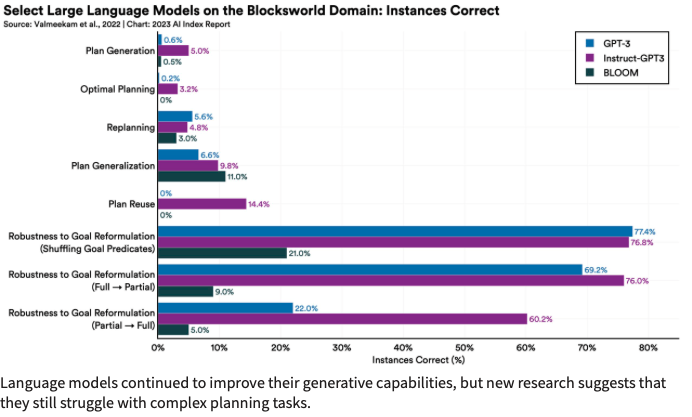

**Figure:** [2023 AI index report, Chapter 2](https://aiindex.stanford.edu/report/)

Text entailment is used to determine whether a text belongs to a particular category based on its entailment relationship with a set of predefined texts. One example of this is text classification. In question answering systems, where the system must infer an answer from a set of premises, it is also used. Moreover, text based entailment is utilized in machine interpretation frameworks to guarantee that the deciphered text precisely conveys the significance of the source text.

Find Textual Entailment Transformer models on [HuggingFace Model Hub / Textual Entailment]((https://huggingface.co/models?other=textual%20entailment))


## 5.4 Embeddings → Scoring

**Embeddings** are numerical representations of words or texts that capture their semantic and syntactic properties.

**Scoring** refers to the process of comparing two or more texts using various metrics to determine their similarity or difference.

In NLP, embeddings and scoring are important tools used for a variety of tasks such as sentiment analysis, machine translation, and information retrieval.

Transformer models, such as BERT and GPT-3, have shown to be highly effective in generating embeddings due to their ability to capture complex relationships and context.


### 5.4.1 Transformer-based Embeddings

Transformer models use a self-attention mechanism to generate contextual embeddings for input text. This means that the embeddings take into account the surrounding words and phrases, as well as the overall context of the text. Transformer-based embeddings have been found to be highly effective in capturing complex relationships, long-range dependencies and context, making them well-suited for a wide range of NLP tasks.



### 5.4.2 Scoring Using Embeddings


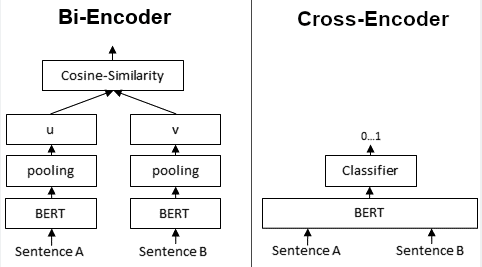

**Figure:** [SBERT Documentation](https://www.sbert.net/examples/applications/cross-encoder/README.html)


Embeddings can be used for scoring in NLP by comparing the embeddings of the input text to those of reference text using various metrics such as cosine similarity or Euclidean distance. The resulting score indicates the similarity or dissimilarity between the two pieces of text, which can be used for various applications such as Text Scoring, Semantical Similarity of Sentences, Sentiment Analysis, Text Classification and Information Retrieval.


#### 5.4.2.1 Sentence similarity:
In this task, the similarity between two sentences is computed using their respective embeddings. The similarity can be measured using cosine similarity, Euclidean distance, or other metrics. High similarity scores indicate that the two sentences are semantically similar.

In the following code snippet, we use [SBERT](https://sbert.net/docs/installation.html) library to infere sentence similarity:


In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
          ]

#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

Top-5 most similar pairs:
A man is eating food. 	 A man is eating a piece of bread. 	 0.7553
A man is riding a horse. 	 A man is riding a white horse on an enclosed ground. 	 0.7369
A monkey is playing drums. 	 Someone in a gorilla costume is playing a set of drums. 	 0.6433
A woman is playing violin. 	 Someone in a gorilla costume is playing a set of drums. 	 0.2564
A man is eating food. 	 A man is riding a horse. 	 0.2474


Plotting Similarity Heatmap

<Axes: >

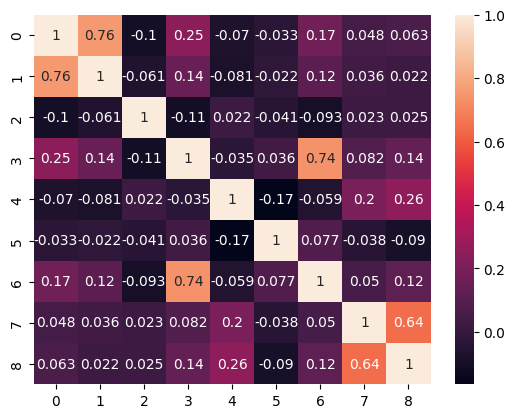

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = cos_sim.tolist()

plt.figure()
labelsX = [i for i in range(len(cos_sim))]
labelsY = [i for i in range(len(cos_sim))]
sns.heatmap(scores, xticklabels=labelsX, yticklabels=labelsY, annot=True)


**Application of Sentence Similarity:**
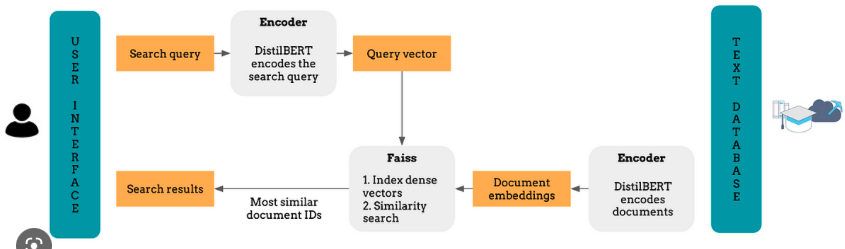

**Figure:** [Semantic Search Engine With Transformers and Faiss](https://towardsdatascience.com/how-to-build-a-semantic-search-engine-with-transformers-and-faiss-dcbea307a0e8)

In this task, the embeddings of the input text are used to retrieve relevant documents from a large corpus. The embeddings of the documents are also generated using the same sentence transformer model.

Find more applications of Sentence Similarity in the [SBERT Publications Page](https://www.sbert.net/docs/publications.html).





#### 5.4.2.2 Text Scoring (Regression)
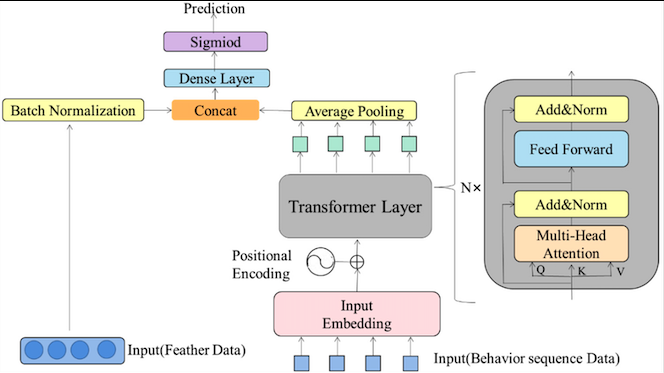

**Figure:** [Credit Scoring Using Feature Embedded Transformer](https://www.mdpi.com/2076-3417/12/21/10995)

* The feature embedded transformer (FE-Transformer) is a deep learning model that uses a transformer neural network for credit scoring based on user online behavioral data.
* The FE-Transformer neural network is composed of two parts: a wide part and a deep part. The deep part of the FE-Transformer uses the transformer neural network to generate embeddings for the input data.
* The output of the transformer neural network and the feature data of the wide part are concentrated in a fusion layer to create a final prediction.
* The FE-Transformer can learn from both user behavioral data and feature data, allowing it to accurately predict user default risk.
* In experiments, the FE-Transformer model outperformed other comparison methods such as LR, XGBoost, LSTM, and AM-LSTM in terms of area under the receiver operating characteristic curve (AUC) and the Kolmogorov–Smirnov (KS) statistic, demonstrating its effectiveness for credit scoring.



#### 5.4.2.4 Text classification:
In this task, the embeddings of the input text are used to predict its label or category. This can be done using a simple classifier, such as logistic regression or Fully-connected neural networks.


### 5.4.3 Limitations of Transformer-based Embeddings for Scoring

* The need of large amounts of training data and the potential for overfitting.
* In some NLP tasks, such as simple text classification, transformer-based embeddings may not be the best approach for scoring.